Is there a way to automate selecting the range over which Phoenix is scaled to G430L?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy import interpolate




%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
opt_spec = glob.glob('g430l/*.fits')

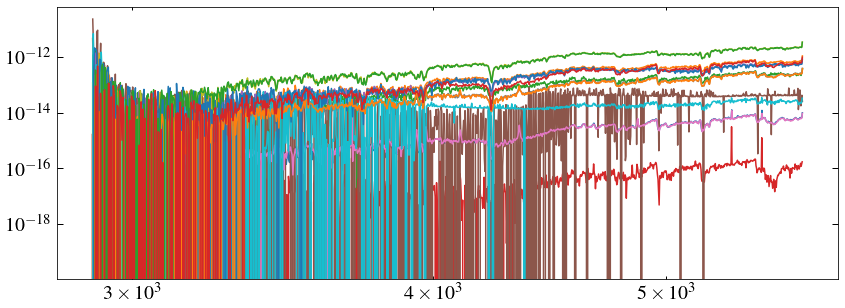

In [7]:
for s in opt_spec:
    data = fits.getdata(s)[0]
    plt.plot(data['WAVELENGTH'], data['FLUX'])
    plt.xscale('log')
    plt.yscale('log')

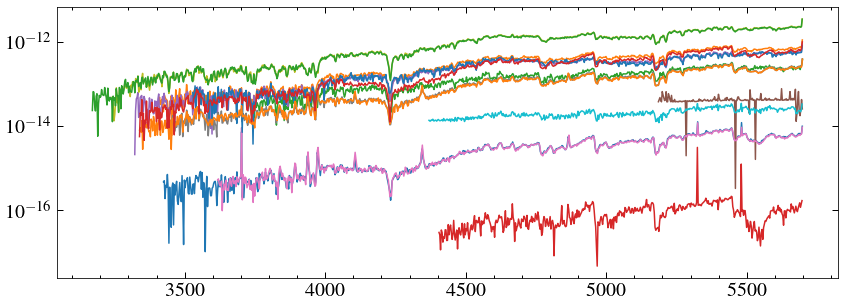

In [11]:
for s in opt_spec:
    data = fits.getdata(s)[0]
    w, f = data['WAVELENGTH'], data['FLUX']
    w0 = w[f<=0.0]
    mask = w > w0[-1]
    plt.plot(w[mask], f[mask])
    #plt.xscale('log')
    plt.yscale('log')

So there's no regular starting point. Bu all of these give a decent amount of flux apart from the brown one, could use that? What about DQ?

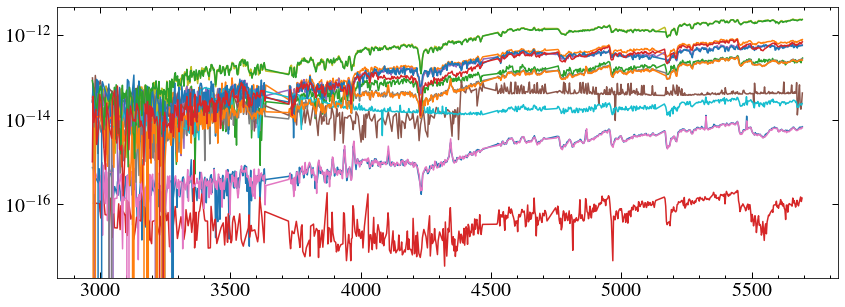

In [15]:
for s in opt_spec:
    data = fits.getdata(s)[0]
    plt.plot(data['WAVELENGTH'][data['DQ']<20], data['FLUX'][data['DQ']<20])
  #  plt.xscale('log')
    plt.yscale('log')

Could use that? But it's getting rid of a lot of the good points as well.

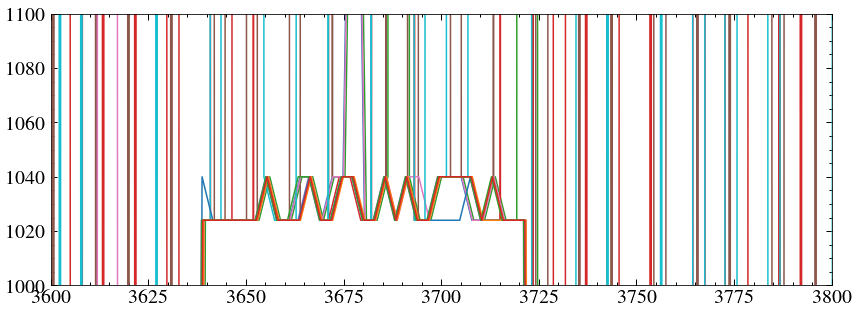

In [19]:
for s in opt_spec:
    data = fits.getdata(s)[0]
    plt.plot(data['WAVELENGTH'], data['DQ'])
  #  plt.xscale('log')
   # plt.yscale('log')
    plt.xlim(3600, 3800)
    plt.ylim(100, 1100)

What's happening at ~3700? 1024 = Small blemish in the ccd. Looking at the unfiltered spectra, it doesn't seem to be affecting anything. We might be able to go with removing the DQ > and  F >0.

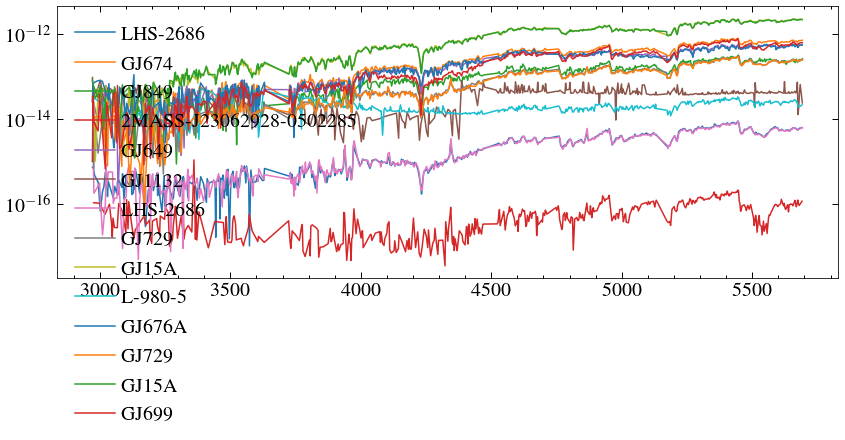

In [24]:
for s in opt_spec:
    target = fits.getheader(s)['TARGNAME']
    data = fits.getdata(s)[0]
    w, f, dq = data['WAVELENGTH'], data['FLUX'], data['DQ']
    mask = (f > 0) & (dq ==0)
    plt.plot(w[mask], f[mask], label=target)
    #plt.xscale('log')
    plt.yscale('log')
    plt.legend()

That looks like it will work.

In [4]:
for s in opt_spec:
    header= fits.getheader(s)
    print(header['ROOTNAME'], header['TARGNAME'])

odlm34010 LHS-2686
odlm21010 GJ674
odlm18010 GJ849
odlm41010 2MASS-J23062928-0502285
odlm12010 GJ649
odlm03010 GJ1132
odlm35010 LHS-2686
odlm37010 GJ729
odlm09010 GJ15A
odlm27010 L-980-5
odlm06010 GJ676A
odlm38010 GJ729
odlm08010 GJ15A
odlm24010 GJ699


Fixing the Trappist-1 spectrum

In [1]:
import build_phoenix as bp

In [7]:
t1_mod = Table.read('../trappist-1/optical/unscaled_02560-5.00-0.0_phoenix_trappist-1.ecsv')
w_phx, f_phx = t1_mod['WAVELENGTH'], t1_mod['FLUX']
ccd_path = '../trappist-1/STIS/odlm41010_sx1.fits'
star='t1'

In [15]:
factors = []
cuts = np.arange(3500, 4600, 100)
for c in cuts:
    n = bp.phoenix_norm(star, w_phx, f_phx, ccd_path, plot=False, cut=c)
    factors.append(n)


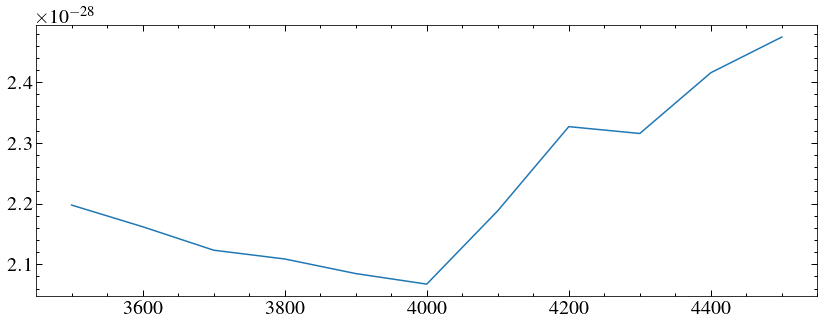

In [16]:
plt.plot(cuts, factors)